In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, optimizers
import numpy as np

Using TensorFlow backend.


In [2]:
train_dir = "/floyd/input/flowers/flowers"

train_data_gen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="categorical",
    subset="training"
)

validation_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="categorical",
    subset="validation"
)

Found 3465 images belonging to 5 classes.
Found 863 images belonging to 5 classes.


In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(5, activation="softmax"))

In [5]:
model.compile(loss="categorical_crossentropy", optimizer=optimizers.rmsprop(lr=1e-4), 
              metrics=["acc"])

In [7]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=50, 
    validation_data=validation_generator, 
    validation_steps=50
)

Epoch 1/50
100/100 [==============================] - 29s 293ms/step - loss: 1.2082 - acc: 0.4940 - val_loss: 1.1410 - val_acc: 0.5534
Epoch 2/50
100/100 [==============================] - 27s 273ms/step - loss: 1.1152 - acc: 0.5490 - val_loss: 1.1238 - val_acc: 0.5361
Epoch 3/50
100/100 [==============================] - 27s 272ms/step - loss: 1.0903 - acc: 0.5610 - val_loss: 1.0751 - val_acc: 0.5758
Epoch 4/50
100/100 [==============================] - 27s 271ms/step - loss: 1.0657 - acc: 0.5755 - val_loss: 1.0337 - val_acc: 0.6083
Epoch 5/50
100/100 [==============================] - 27s 274ms/step - loss: 1.0145 - acc: 0.6075 - val_loss: 1.0882 - val_acc: 0.5849
Epoch 6/50
100/100 [==============================] - 27s 273ms/step - loss: 0.9934 - acc: 0.6000 - val_loss: 1.0166 - val_acc: 0.6063
Epoch 7/50
100/100 [==============================] - 27s 273ms/step - loss: 0.9926 - acc: 0.6155 - val_loss: 0.9995 - val_acc: 0.6063
Epoch 8/50
100/100 [==============================] - 2

In [9]:
model.save("flowers_model.h5")

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend()

NameError: name 'history' is not defined

In [3]:
loaded_model = models.load_model("flowers_model.h5")

In [7]:
flowers = list(train_generator.class_indices.keys())
flowers

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

'rose'

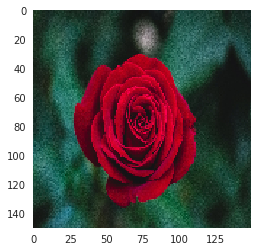

In [16]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img('/floyd/input/test_images/rose.jpg', target_size=(150, 150, 3))
x = img_to_array(img)
x = np.reshape(x, (1, 150, 150, 3))

ims = plt.imshow(img)
ax = plt.gca()

ax.grid(False)

flowers[np.argmax(loaded_model.predict(x))]

'tulip'

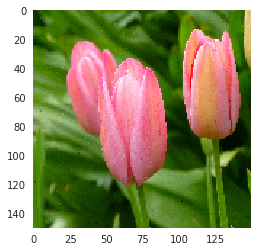

In [17]:
img = load_img('/floyd/input/test_images/tulip.jpg', target_size=(150, 150, 3))
x = img_to_array(img)
x = np.reshape(x, (1, 150, 150, 3))

ims = plt.imshow(img)
ax = plt.gca()

ax.grid(False)

flowers[np.argmax(loaded_model.predict(x))]